# BigQuery Examples

In [2]:
%load_ext google.cloud.bigquery
import google.cloud.bigquery.magics
import pandas as pd

# use bqstorage for large query results
google.cloud.bigquery.magics.context.use_bqstorage_api = True

def perform_query(sql, dialect='legacy'):
    return pd.read_gbq(sql, dialect=dialect, use_bqstorage_api=True)

## Reddit Comments

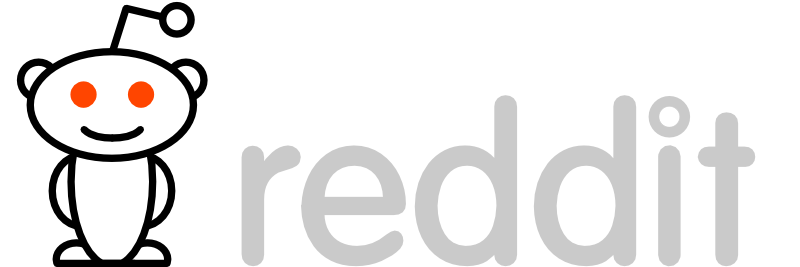

Use Cases:

* extract related videos
* extract [cryptocurrencies sentiments](https://github.com/fluquid/cryptocurrency) ;)
* etc.

[Live Query](https://bigquery.cloud.google.com/results/asdf-167312:US.bquijob_1dc61ccc_1651f0db2c5)

In [3]:
reddit_query = """
SELECT body, link_id
FROM [fh-bigquery:reddit_comments.2018_07]
WHERE subreddit_id = 't5_2qh1e'
AND (body CONTAINS 'youtu.be' or body CONTAINS 'youtube.com')
ORDER BY link_id;
"""
# this query ignores limit requests, so restrain yourself ;)

perform_query(reddit_query).head(10)

Downloading: 100%|██████████| 9094/9094 [00:04<00:00, 2604.30rows/s]


body    link_id
0  And 7 years later in 1969, Neil Armstrong beca...  t3_7wptw2
1  I dunno... [Mr. Marvin Gaye...](https://www.yo...  t3_7ymeia
2  How does it compare to this one? https://www.y...  t3_8551k1
3  Compared to this guy, he does.\nhttps://youtu....  t3_86ak1o
4    dangerous for democracy \n\n[Review](http://...  t3_88ll08
5  Hey, thanks so much! Weird to hear about the a...  t3_89vpne
6  Hey hey! Just wanted to let you know Episode 3...  t3_89vpne
7  &gt; https://youtu.be/YF8I-PotoK8\n\nShit, I f...  t3_8lnm0o
8  [Oh these killers](https://www.youtube.com/wat...  t3_8mox83
9  Is this a good method? https://www.youtube.com...  t3_8o1n0l

## Github Archive

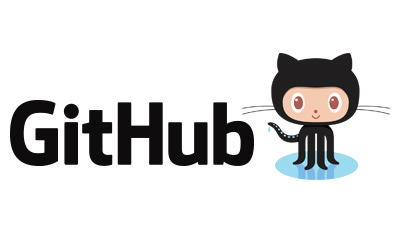

* https://www.gharchive.org/

Use Cases:

* find related, similar projects using Association Rules/ Basket Analysis of stars
* analyze project health and activity
* perform competitive intelligence, find main committers on projects
* find similar users to follow

[Live Query](https://bigquery.cloud.google.com/results/asdf-167312:US.bquijob_66a061fa_1651e735e63)


### Github Repos

* https://bigquery.cloud.google.com/dataset/bigquery-public-data:github_repos
* contents from 2.9m public, open source repositories

In [4]:
github_query = """
SELECT
  actor.login,
  actor.id,
  repo.name,
  repo.id
FROM [githubarchive:day.20191127]
WHERE
  type = "WatchEvent"
LIMIT 10;
"""

perform_query(github_query).head(10)

Downloading: 100%|██████████| 10/10 [00:01<00:00,  8.57rows/s]


actor_login  actor_id                               repo_name    repo_id
0        seven1m       669               asvetliakov/vscode-neovim  218653810
1           bbum      2791                         JohnSundell/Ink  224025653
2  prashantrajan      5276  theanalyst/awesome-distributed-systems   31384503
3  prashantrajan      5276         kamranahmedse/developer-roadmap   85077558
4        cpunion      8459                        greydanus/scribe   66898503
5        cpunion      8459                  githubharald/SimpleHTR  137219689
6      khoerling      9319         FiberJW/react-native-stylehooks  223549171
7         simonw      9599                     RhetTbull/osxphotos  192160985
8            dai     12391    nateshmbhat/windows-terminal-tweaker  196796095
9          ajaya     13287            fuzziebrain/docker-oracle-xe  153964246

In [ ]:
%%bigquery
SELECT count(*) as num_stars, EXTRACT(MONTH FROM created_at) as month, repo.name
FROM `githubarchive.year.2018`
WHERE type = 'WatchEvent'
GROUP BY month, repo.name
ORDER BY month
LIMIT 20;

### My Star History

Let's find out what repos I starred in October.

In [6]:
github_query = """
SELECT
  actor.login,
  actor.id,
  repo.name,
  repo.id
FROM [githubarchive:month.202001]
WHERE
  type = "WatchEvent" AND actor.login = 'codinguncut'
ORDER BY created_at DESC
LIMIT 10;
"""

perform_query(github_query).head(10)

Downloading: 100%|██████████| 6/6 [00:01<00:00,  4.09rows/s]


actor_login  actor_id                         repo_name    repo_id
0  codinguncut   2112583                   axa-group/Parsr  200653543
1  codinguncut   2112583     WHSnyder/LegoTrainingRenderer  221569090
2  codinguncut   2112583   ernestbofill/lego-image-dataset   73081534
3  codinguncut   2112583    kirill-sidorchuk/lego_detector  107015101
4  codinguncut   2112583              mreutegg/lego-sorter  121970388
5  codinguncut   2112583  jtheiner/LegoBrickClassification  149310840

In [8]:
github_query = """
SELECT
  actor.id,
  repo.name
FROM [githubarchive:month.202001]
WHERE
  type = "WatchEvent";
"""

df = perform_query(github_query)

Downloading: 100%|██████████| 3551360/3551360 [02:43<00:00, 21692.08rows/s]


In [9]:
grouped = df.groupby('actor_id')
grouped.get_group(2112583)

actor_id                         repo_name
530455    2112583              mreutegg/lego-sorter
570985    2112583  jtheiner/LegoBrickClassification
691072    2112583    kirill-sidorchuk/lego_detector
969099    2112583     WHSnyder/LegoTrainingRenderer
1502380   2112583   ernestbofill/lego-image-dataset
2110283   2112583                   axa-group/Parsr

In [ ]:
from efficient_apriori import apriori

def txs():
    count = 0
    for _, group in grouped:
        yield tuple([row['repo_name'] for _, row in group.iterrows()])
        count += 1
        if count > 10:
            break

itemsets, rules = apriori(txs(), min_support=0.000001,  min_confidence=0.000001)

In [ ]:
rules

## GDELT

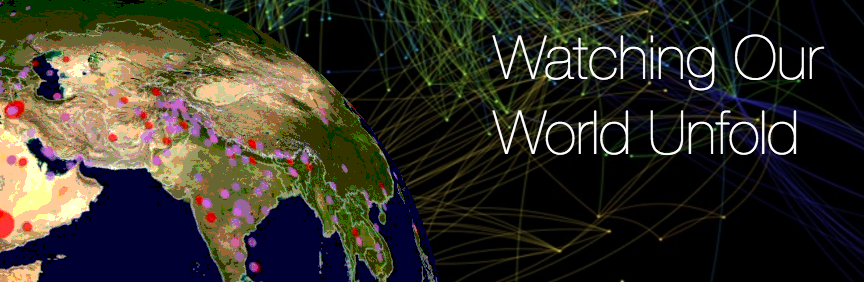

Monitors the world's broadcast, print, and web news from nearly every corner of every country in over 100 languages and identifies the people, locations, organizations, counts, themes, sources, emotions, counts, quotes, images and events.

Use Cases:

* use world events for financial modelling
* track corporate news events for due diligence
* use to train NER and sentiment analysis

[Live Query](https://bigquery.cloud.google.com/results/asdf-167312:US.bquijob_6fbdd131_15f06ba0085)

In [43]:
gdelt_query = """
SELECT SQLDATE, Actor1Code, Actor1Name, Actor2Code, Actor2Name, AvgTone, SOURCEURL
FROM [gdelt-bq:gdeltv2.events]
WHERE MonthYear == 202002
    AND SQLDATE == 20191127
    AND Actor1Code == 'IRLGOV'
ORDER BY SQLDATE DESC
"""

perform_query(gdelt_query)

Downloading: 100%|██████████| 37/37 [00:01<00:00, 29.18rows/s]


SQLDATE Actor1Code       Actor1Name Actor2Code          Actor2Name  \
0   20191127     IRLGOV   PAUL GALLAGHER       None                None   
1   20191127     IRLGOV          IRELAND       None                None   
2   20191127     IRLGOV          IRELAND       None                None   
3   20191127     IRLGOV          IRELAND       None                None   
4   20191127     IRLGOV          IRELAND        AGR              FARMER   
5   20191127     IRLGOV          IRELAND        LEG            DELEGATE   
6   20191127     IRLGOV          IRELAND        IRL             IRELAND   
7   20191127     IRLGOV          IRELAND        LEG            DELEGATE   
8   20191127     IRLGOV            IRISH        IRL               IRISH   
9   20191127     IRLGOV            IRISH        IRL               IRISH   
10  20191127     IRLGOV          IRELAND        CVL           COMMUNITY   
11  20191127     IRLGOV          IRELAND     IRLCOP             IRELAND   
12  20191127     IRLGOV          IRELAND       None                None   
13  20191127     IRLGOV           DUBLIN       None                None   
14  20191127     IRLGOV   MICHEAL MARTIN       None                None   
15  20191127     IRLGOV          IRELAND        IRL             IRELAND   
16  20191127     IRLGOV          IRELAND        IRL             IRELAND   
17  20191127     IRLGOV          IRELAND        IRL               IRISH   
18  20191127     IRLGOV          IRELAND        AGR              FARMER   
19  20191127     IRLGOV          IRELAND        IRL             IRELAND   
20  20191127     IRLGOV          IRELAND        AGR              FARMER   
21  20191127     IRLGOV          IRELAND       None                None   
22  20191127     IRLGOV           DUBLIN       None                None   
23  20191127     IRLGOV          IRELAND       None                None   
24  20191127     IRLGOV          IRELAND       None                None   
25  20191127     IRLGOV            IRISH        IRL               IRISH   
26  20191127     IRLGOV           DUBLIN        IRL             IRELAND   
27  20191127     IRLGOV          IRELAND        GOV          GOVERNMENT   
28  20191127     IRLGOV            IRISH        MED          TELEVISION   
29  20191127     IRLGOV          IRELAND       None                None   
30  20191127     IRLGOV          IRELAND        GOV  MINIST FOR JUSTICE   
31  20191127     IRLGOV          IRELAND        GOV  MINIST FOR JUSTICE   
32  20191127     IRLGOV          IRELAND        IRL             IRELAND   
33  20191127     IRLGOV          IRELAND        AGR              FARMER   
34  20191127     IRLGOV  MICHAEL COLLINS        IRL             IRELAND   
35  20191127     IRLGOV   MICHEAL MARTIN        GOV          GOVERNMENT   
36  20191127     IRLGOV   MICHEAL MARTIN        GOV          GOVERNMENT   

      AvgTone                                          SOURCEURL  
0   -2.752294  https://www.dp.ru/a/2019/11/26/Dopraboti_za_sp...  
1    0.000000  https://www.midwestradio.ie/index.php/news/351...  
2    3.799815  https://www.irishbuildingmagazine.ie/2019/11/2...  
3   -3.159851  https://www.independent.ie/business/farming/ne...  
4   -5.450942  https://www.breakingnews.ie/ireland/farmers-sa...  
5   -3.159851  https://www.independent.ie/business/farming/ne...  
6   -3.159851  https://www.independent.ie/business/farming/ne...  
7   -3.159851  https://www.independent.ie/business/farming/ne...  
8   -0.369004     https://www.bbc.com/news/world-europe-50567173  
9   -8.430493  https://www.cpa.org.au/guardian/2019/1896/08-k...  
10  -4.063604  https://www.thejournal.ie/avalon-house-homeles...  
11  -4.063604  https://www.thejournal.ie/avalon-house-homeles...  
12  -0.338983  https://www.kilkennypeople.ie/news/home/497152...  
13 -13.114754  https://www.leinsterleader.ie/news/home/497234...  
14  -4.944179  https://www.independent.ie/breaking-news/irish...  
15  -0.338983  https://www.kilkennypeople.ie/news/home/497152...  
16   1.470588  

## Entities

What entities did GDELT find and resolve?

In [50]:
gdelt_query = """
SELECT Actor1Code as code, Actor1Name as name
FROM `gdelt-bq.gdeltv2.events`
WHERE MonthYear = 201909
AND SOURCEURL = 'https://www.t-online.de/nachrichten/ausland/eu/id_85503600/brexit-so-reagiert-premier-boris-johnson-auf-das-urteil-des-supreme-court.html'

UNION ALL

SELECT Actor2Code as code, Actor2Name as name
FROM `gdelt-bq.gdeltv2.events`
WHERE MonthYear = 201909
AND SOURCEURL = 'https://www.t-online.de/nachrichten/ausland/eu/id_85503600/brexit-so-reagiert-premier-boris-johnson-auf-das-urteil-des-supreme-court.html'
"""

df = perform_query(gdelt_query, dialect='standard')

Downloading: 100%|██████████| 46/46 [00:01<00:00, 33.28rows/s]


In [51]:
df.drop_duplicates()

code               name
0     None               None
2   CHRCTH           CATHOLIC
3      IRL              IRISH
5   IRLGOV              IRISH
7      LAB           EMPLOYEE
8   GOVGOV            PREMIER
9      BEL            BELGIUM
10     GOV         GOVERNMENT
13     GOV  MINIST OF FINANCE
14  GBRGOV     UNITED KINGDOM
15     BEL           BRUSSELS
22  scoGOV           SCOTTISH
29  IRLGOV            IRELAND
30     FRA             FRENCH
37     FRA             FRANCE
45     GBR           SCOTLAND

## Stack Overflow

<div>
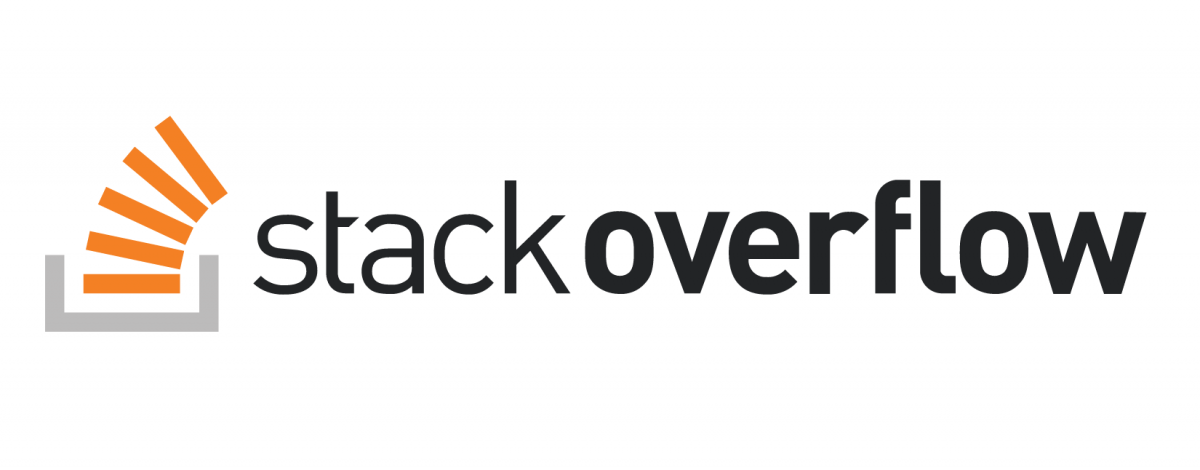
</div>                                 


In [18]:
so_query = """
SELECT creation_date, user_id, text
FROM [fh-bigquery:stackoverflow_archive.201906_post_history]
LIMIT 10
"""

perform_query(so_query)

Downloading: 100%|██████████| 10/10 [00:01<00:00,  7.44rows/s]


creation_date  user_id  \
0 2013-06-11 22:47:22.927000+00:00  2455407   
1 2012-01-18 04:07:40.193000+00:00   411459   
2 2011-03-17 17:16:38.473000+00:00   654796   
3 2013-07-09 16:34:46.873000+00:00   122139   
4 2016-08-07 18:56:38.363000+00:00  1413395   
5 2014-08-27 15:51:06.197000+00:00  2487496   
6 2017-09-25 17:34:03.050000+00:00  7793367   
7 2014-02-20 14:11:13.880000+00:00   138557   
8 2016-03-08 08:14:41.403000+00:00   633183   
9 2018-05-25 22:55:42.020000+00:00  3086551   

                                                text  
0  How can I set an input mask property to a text...  
1    JMS/ActiveMQ Dynamic Creation/Removal of topics  
2  cursor.execute("INSERT INTO im_entry.test ("+e...  
3                                   <vba><ms-access>  
4  I'm using the Visitor pattern to implement ref...  
5                           403 Error with Mechanize  
6                   Put a comma in a specific column  
7  Make a custom route for each of the different ...  
8  Your code structure is very unconventional and...  
9  I have constructed an ansible variable using t...

## Libraries.io

<div>
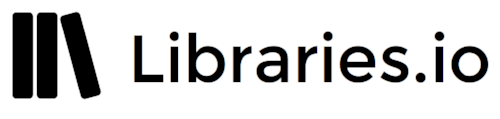
</div>

Libraries.io gathers data from 37 package managers and 3 source code repositories. We track over 2.7m unique open source packages, 33m repositories and 235m interdependencies between them. This gives Libraries.io a unique understanding of open source software. An understanding that we want to share with you. 

https://libraries.io/data

In [20]:
libs_query = """
SELECT project_name, version_number, dependency_name, dependency_requirements
FROM [bigquery-public-data:libraries_io.dependencies]
WHERE dependency_platform = 'Pypi'
LIMIT 10
"""

perform_query(libs_query)

Downloading: 100%|██████████| 10/10 [00:01<00:00,  6.49rows/s]


project_name version_number dependency_name dependency_requirements
0          latexbuild          0.0.1          Jinja2                   >=2.8
1          latexbuild          0.1.0          Jinja2                   >=2.8
2          latexbuild          0.1.1          Jinja2                   >=2.8
3          latexbuild          0.2.0          Jinja2                   >=2.8
4          latexbuild          0.2.1          Jinja2                   >=2.8
5       handwritingio          1.0.0       pyRFC3339                  <2,>=1
6       handwritingio          1.0.0        requests                  <3,>=2
7       handwritingio          1.0.0             six                <2,>=1.1
8  python-frontmatter          0.1.0          PyYAML                       *
9  python-frontmatter          0.1.1          PyYAML                       *